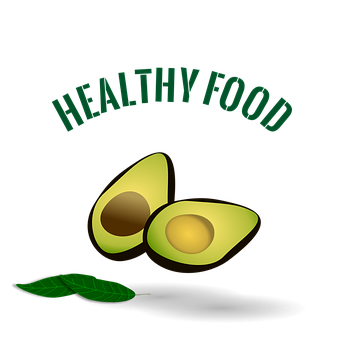

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../input/avocado-prices/avocado.csv')

In [ ]:
df.head()

###### Initial thoughts:

- Drop the 'Unnamed' column because it's an index and we already have one from pandas (the column to the left of the 'unnamed' column
- What do the columns '4046', '4225', and '4770' represent? 
- Can we get rid of the decimals for some of the columns? For example - "Total Volume" - I think it would be easier to look at and work with integers as opposed to floats.

In [ ]:
df.shape

In [ ]:
df.info()

The data set contains a total of 18249 rows and 14 columns. 

Luckily, we don't have any missing data! 

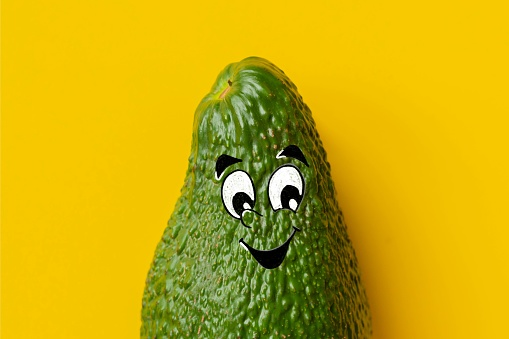

### Let's drop the 'unnamed' column. 

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [ ]:
# Quick sanity check to make sure the column was dropped
df.head()

### Let's take a look at what the columns '4046', '4225', and '4770' represent.

A quick google search revealed that '4046', '4225', and '4770' are a way to dinstinguish between avocado size.

[Link to source.](https://loveonetoday.com/how-to/identify-hass-avocados/)

- 4046, Small/Medium Hass Avocado (3-5oz avocado)
- 4225, Large Hass Avocado (8-10oz avocado)
- 4770, Extra Large Hass Avocado (10-15oz avocado)

Based on this information, I'll update the column names to make it easier to work with and understand the data. 



In [ ]:
df.rename(columns={'4046': 'Small/Medium Avocado', '4225': 'Large Avocado', '4770': 'Extra Large Avocado'}, inplace=True)
df.head(2)

### Convert integers to floats

In [ ]:
to_convert = ['Total Volume', 
              'Small/Medium Avocado', 
              'Large Avocado', 
              'Extra Large Avocado', 
              'Total Bags', 
              'Small Bags', 
              'Large Bags', 
              'XLarge Bags']

In [ ]:
for i in to_convert:
    df[i] = df[i].astype('int64')

In [ ]:
# Make sure the columns were converted to int64
df.info()

### Convert 'Date' column to Pandas date time format


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

In [ ]:
# Confirm the 'Date' column was updated
df.info()

### Now we can start exploring and visualizing our data

In [ ]:
# Check how many years of data we're working with
df.year.value_counts()

In [ ]:
df.head(5)

## Comparing total avocados sold from 2015-2018

In [ ]:
quantity_per_year = df.groupby('year')['Total Volume'].sum().reset_index()
quantity_per_year

Seems like there is increasing demand for avocados - can we confirm that?

## Comparing total sales within the United States by year

In [ ]:
# Let's visualize the total number of avocados sold within the US between 2015 and 2018

sns.catplot(x="year", y='Total Volume', kind="bar", palette="muted", data=quantity_per_year, height = 5)

plt.xlabel('Year')
plt.ylabel('Number of avocados sold (billion avocados)')
plt.subplots_adjust(top=0.9)
plt.suptitle('Total avocados sold in the US between 2015-2018',  size=14)

plt.show()

Total avocado sales in the US have been on an uptrend from 2015 until 2017 according to our graph. Unfortunately, it seems like we don't have a full year worth of data for 2018. Nonetheless, we can continue exploring what we have! 

## Graphing the price distribution

In [ ]:
plt.figure(figsize=(10,4))
plt.title("Price Distribution of Avocados")
sns.distplot(df["AveragePrice"])

plt.xlabel('Average Price per avocado')
plt.show()

## Graphing avocado prices 2015-2018

First of all, we'll need to group the average price of avocados by month/year. Luckily, we can easily do this since we've already convered the 'Date' column to 'datetime64' format. 

In [ ]:
grouped_by_month = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'AveragePrice':'mean'}).reset_index()
grouped_by_month.head()

In [ ]:
plt.figure(figsize=(16,5))

sns.lineplot(x='Date', y='AveragePrice', data=grouped_by_month, color='darkgreen')

plt.xticks(grouped_by_month.Date) 
plt.xticks(rotation=90)

plt.title('Average price of avocados by Month/Year', size=15)
plt.ylabel('Average Price', size=13)
plt.xlabel('Year-Month', size=13)

plt.show()

In [ ]:
price_per_year = df.groupby('year')['AveragePrice'].mean().reset_index()
price_per_year

The avocado industry suffered a major shortage in 2017 due to a low harvest. The low supply, combined with rapdily growing demand shot up the price of avocados in 2017, which is portrayed by the linegraph as well as the table above. 

[Link](https://www.bbc.com/news/business-39768480) - One of many newsources which reported the state of the avocado industry in 2017.

Unfortunately, we only have data for the first 3 months of 2018. Let's run a comparison for avocados sold during the first 3 months in 2015-2018.

![Alt Text](https://media.giphy.com/media/3oD3YrUgucpmkZr5a8/giphy.gif) 

### Comparing total first quarter sales from 2015-2018

In [ ]:
volume_3_months = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'Total Volume':'sum'}).reset_index()

# Total sales during the first 3 months of 2015
first_quarter_2015 = volume_3_months.loc[volume_3_months['Date'] < '2015-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2016
first_quarter_2016 = volume_3_months.loc[volume_3_months['Date'] > '2015-12-31']
first_quarter_2016 = first_quarter_2016.loc[first_quarter_2016['Date'] < '2016-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2017
first_quarter_2017 = volume_3_months.loc[volume_3_months['Date'] > '2016-12-31']
first_quarter_2017 = first_quarter_2017.loc[first_quarter_2017['Date'] < '2017-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2018
first_quarter_2018 = volume_3_months.loc[volume_3_months['Date'] > '2017-12-31']
first_quarter_2018 = first_quarter_2018.loc[first_quarter_2018['Date'] < '2018-4-01'][['Total Volume']].values.sum()

In [ ]:
# Create a series using the first quarter sales for 2015-2018

quarter_1_total = [first_quarter_2015, first_quarter_2016, first_quarter_2017, first_quarter_2018]

quarter_1_total_array = np.array([i for i in quarter_1_total])
quarter_1_total_array

first_quarter_volumes = pd.Series(quarter_1_total_array, index=['Q1 - 2015', 'Q1 - 2016', 'Q1 - 2017', 'Q1 - 2018'])
first_quarter_volumes = first_quarter_volumes.to_frame().reset_index()
# comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])
first_quarter_volumes.columns = ['Q1 Sales - Year', 'Total Avocados Sold (billion avocados)']
first_quarter_volumes


In [ ]:
clrs = ['red' if (x < max(quarter_1_total)) else 'darkgreen' for x in quarter_1_total]

q1_plot = sns.barplot(x='Q1 Sales - Year', y='Total Avocados Sold (billion avocados)', data=first_quarter_volumes, palette=clrs)

plt.subplots_adjust(top=0.85)
plt.suptitle('Total Avocados sold between January 1 - March 31', size=14)

plt.show()

More avocados were sold in the first quarter of 2018 then any other first quarter from our dataset. If this trend continued than 2018 would see the highest number of sales in comparison to 2015-2017. Intuition tells us that this was probably the case, however we can't confirm that without looking at the full year data. 

[Link](https://hassavocadoboard.com/) - Updated data can be downloaded here.

## Comparing Conventional and Organic Avocados

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(x='type', y='AveragePrice', palette="Set2", data=df)

plt.xlabel('Type')
plt.ylabel('Average Price', size=11)
plt.title('Conventional vs Organic Avocados', size=13)

plt.show()

We can infer that organic avocados are, on average, more expensive than conventional avocados. This data makes sense because organic food tends to be more expensive in comparison to traditional food.

## Analyze total sales by region

In [ ]:
df.head(2)

In [ ]:
sales_by_region = df.groupby('region')['Total Volume'].sum().reset_index()
sales_by_region = sales_by_region.sort_values('Total Volume',ascending=False)

top_10 = sales_by_region[:11]
top_10

In [ ]:
plt.figure(figsize=(6,8))

sns.barplot(x='Total Volume', y='region', orient='h', data=top_10 )

# Let's visualize the total number of avocados sold within the US between 2015 and 2018

plt.title('Most avocados sold by region')
plt.ylabel('Region')
plt.xlabel('Total Volume (billion avocados)')

plt.show()

There are lots of avocado fans out there!

## Consumption in the top 10 regions compared to the rest of the US

In [ ]:
# How many regions are there in total? 
df.region.nunique()

In [ ]:
# Calculating the total consumption of the top 10 regions
ten_regions_total = top_10['Total Volume'][1:].sum()
ten_regions_total

# Calculating the total consumption of the remaining regions
remaining_regions = sales_by_region[11:]
remaining_regions = remaining_regions['Total Volume'].sum()

# Inputting both in a series
comparison = np.array([ten_regions_total, remaining_regions])
comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])

remaining_regions
comparison

In [ ]:
comparison.plot.pie(subplots=True, figsize=(10, 5), autopct='%1.0f%%')

plt.title('Volume between the top 10 and the remaining regions')
plt.ylabel('')

plt.show()

We can see that the top 10 avocado consuming regions within the United States account for approximately 68% of total consumption. The rest of the regions - 44 of them - combined only consumed 32%. 

###### There is a lot more to explore with our dataset. Some ideas for further analysis include:

- Is there a big difference in price of avocados between each region?
- What region tends to buy larger quantities (extra large bags)?
- What regions purchase more organic avocados in comparison to traditional?
- How many people live in each region in comparison to how many avocados were consumed? Is the reason for the high consumption in the top 10 regions simply a higher population, or are people living there just avocado enthusiasts?

#### I hope you found this analysis useful! 

#### Please feel free to provide any feedback or ideas that you may have.